In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../testdata/10M.nt_1in2_test.gz_org.csv",encoding = "ISO-8859-1", skipinitialspace=True)
print(df[:10])
print(df2[:10])

   set  median     mean   stddev      top1      top5     top10  sampleSize  \
0    0       1   4.6041  31.4658   87.3176   92.0488   94.4051      446675   
1    3       1   1.0000   0.0000  100.0000  100.0000  100.0000         844   
2    4       1  11.5338  76.4418   82.4615   92.8462   94.3846        1300   
3    5       1   2.5595  26.6033   96.9590   98.3306   98.7277       11082   
4    6       1   9.8060  64.5070   90.8430   92.9013   93.4855       14721   
5    7       1  19.2554  93.2768   81.2231   87.2313   89.6711        9304   
6    8       1  14.0095  90.8372   79.9232   87.9089   90.9416        7551   
7    9       1  11.7630  72.2867   79.7674   88.6659   92.0441        8170   
8   10       1  10.2455  66.5274   79.3100   88.1575   91.7346        9449   
9   11       1   6.5896  37.9472   83.0382   90.2951   93.5590       11520   

   #subjects  
0     446675  
1        211  
2        260  
3       1847  
4       2103  
5       1163  
6        839  
7        817  
8     

NameError: name 'df2' is not defined

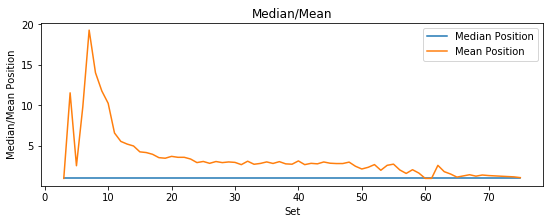

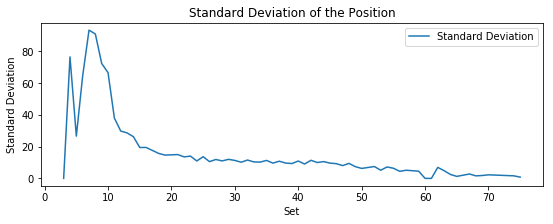

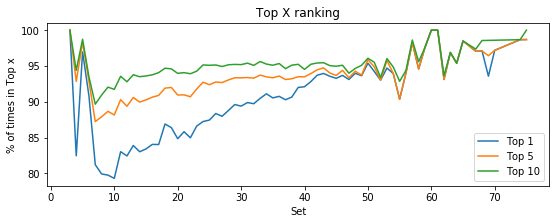

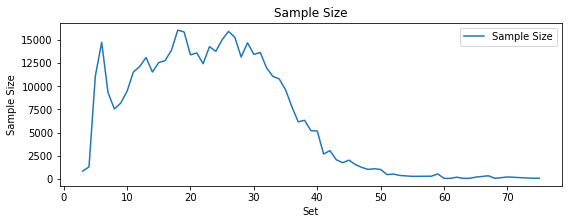

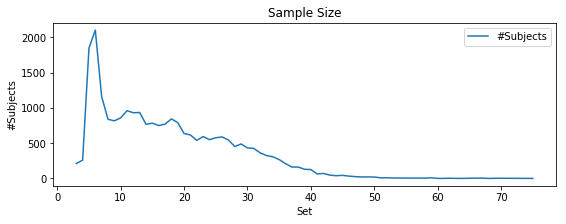

In [3]:
df_detailed = df[df['set'] != 0]
df_overview = df[df['set'] == 0]

#size
plt.rcParams["figure.figsize"] =(9,3)


#median and mean
plt.plot(df_detailed['set'],df_detailed['median'], label="Median Position")
plt.plot(df_detailed['set'],df_detailed['mean'], label="Mean Position")
plt.title("Median/Mean")
plt.xlabel("Set")
plt.ylabel("Median/Mean Position")
plt.legend()
plt.show()

#standard deviation
plt.plot(df_detailed['set'],df_detailed['stddev'], label="Standard Deviation")
plt.title("Standard Deviation of the Position")
plt.xlabel("Set")
plt.ylabel("Standard Deviation")
plt.legend()
plt.show()

#topX
plt.plot(df_detailed['set'],df_detailed['top1'], label="Top 1")
plt.plot(df_detailed['set'],df_detailed['top5'], label="Top 5")
plt.plot(df_detailed['set'],df_detailed['top10'], label="Top 10")
plt.title("Top X ranking")
plt.xlabel("Set")
plt.ylabel("% of times in Top x")
plt.legend()
plt.show()

#sample size 
plt.plot(df_detailed['set'],df_detailed['sampleSize'], label="Sample Size")
plt.title("Sample Size")
plt.xlabel("Set")
plt.ylabel("Sample Size")
plt.legend()
plt.show()

#subject 
plt.plot(df_detailed['set'],df_detailed['#subjects'], label="#Subjects")
plt.title("Sample Size")
plt.xlabel("Set")
plt.ylabel("#Subjects")
plt.legend()
plt.show()

Detailed look on [0,20]

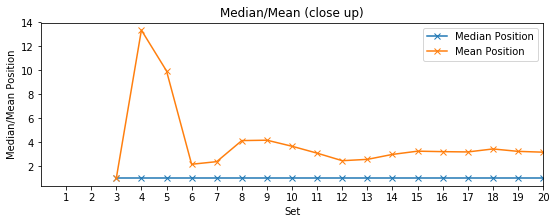

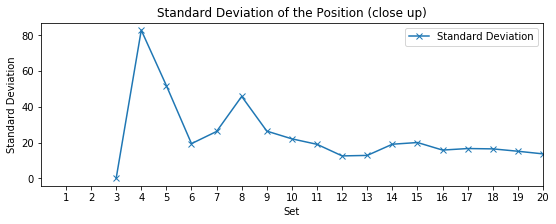

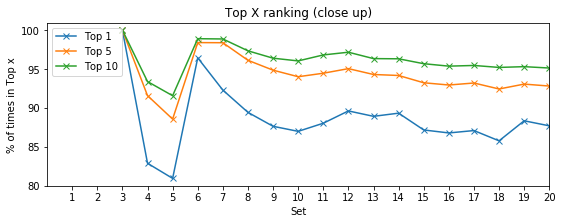

In [4]:
#median and mean
plt.rcParams["figure.figsize"] =(9,3)

plt.plot(df_detailed['set'],df_detailed['median'], label="Median Position", marker='x')
plt.plot(df_detailed['set'],df_detailed['mean'], label="Mean Position", marker='x')
plt.title("Median/Mean (close up)")
plt.xlabel("Set")
plt.ylabel("Median/Mean Position")
plt.xlim((0, 20))
plt.xticks(np.arange(1, 21, 1.0))
plt.legend()
plt.show()

#standard deviation
plt.plot(df_detailed['set'],df_detailed['stddev'], label="Standard Deviation", marker='x')
plt.title("Standard Deviation of the Position (close up)")
plt.xlabel("Set")
plt.ylabel("Standard Deviation")
plt.xlim((0, 20))
plt.xticks(np.arange(1, 21, 1.0))
plt.legend()
plt.show()

#topX
plt.plot(df_detailed['set'],df_detailed['top1'], label="Top 1", marker='x')
plt.plot(df_detailed['set'],df_detailed['top5'], label="Top 5", marker='x')
plt.plot(df_detailed['set'],df_detailed['top10'], label="Top 10", marker='x')
plt.xlim((0, 20))
plt.xticks(np.arange(1, 21, 1.0))
plt.title("Top X ranking (close up)")
plt.xlabel("Set")
plt.ylabel("% of times in Top x")
plt.legend()
plt.show()

Compare 3 different files (Adapt paths!)

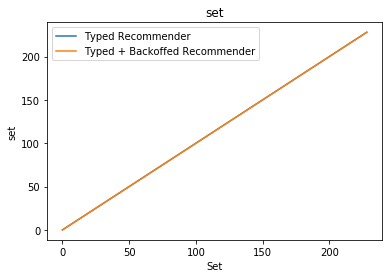

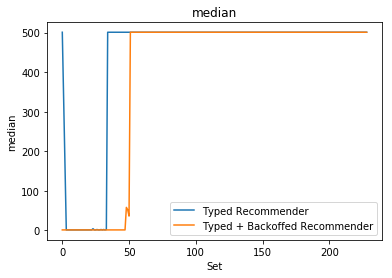

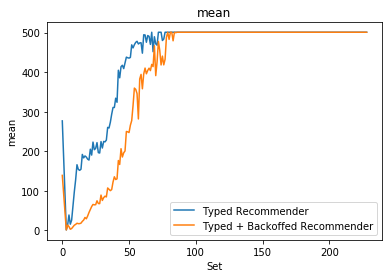

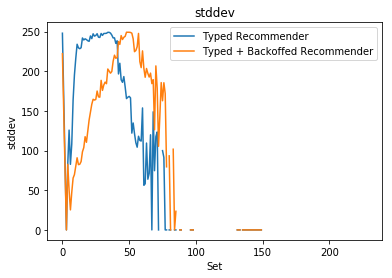

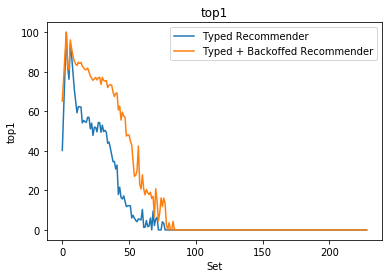

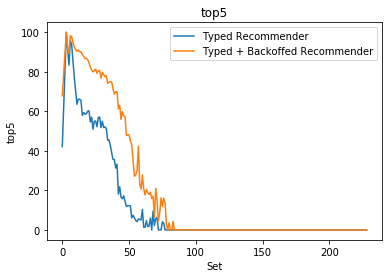

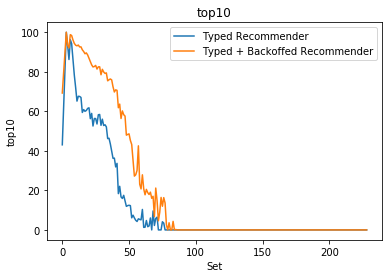

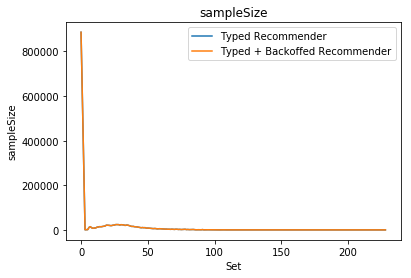

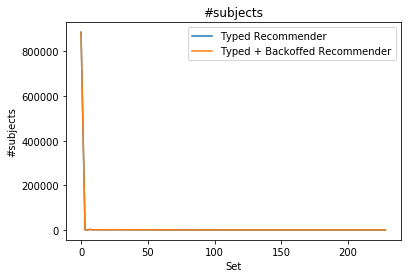

In [8]:

df_recommender = pd.read_csv("../testdata/10M.nt_1in2_test.gz_org.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_types = pd.read_csv("../testdata/adapted2/10M.nt_1in2_test.gz_typed.csv",encoding = "ISO-8859-1", skipinitialspace=True)
df_types_and_backoff = pd.read_csv("../testdata/adapted2/10M.nt_1in2_test.gz_typed_backoff.csv",encoding = "ISO-8859-1", skipinitialspace=True)

for column in df_recommender:
    #standard deviation
    #plt.plot(df_recommender['set'],df_recommender[column], label="Standard Recommender")
    plt.plot(df_types['set'],df_types[column], label="Typed Recommender")
    plt.plot(df_types_and_backoff['set'],df_types_and_backoff[column], label="Typed + Backoffed Recommender")
    plt.title(column)
    plt.xlabel("Set")
    plt.ylabel(column)
    plt.legend()
    plt.show()



